# Sentimental Analysis of Youtube Comments

## Reading in the data

In [34]:
import pandas as pd
import numpy as np 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import preprocessing
import get_youtube_comments as g

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\djasb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
g.get_comments("0L2JoeJTfZY", "dogs")

Before commenting &quot;Except a dog can&#39;t live that long,&quot; watch the video...
dog really is a best friend
first movie in such a long time I tried to held my tears
Me and my family watched this my mom and younger sis was crying exept for me and my dad lol
If you put up sad piano song my room will literally be flooded with my tears
God i hate dogs they bring me so much joy and so much saddnes but in the other hand my dog is the best what could ever happen to me
i remmember that movie it is too good
This film i watched 2 years ago and it was so emotional
I cried watching this.
not me sobbing over the family cat dying
I SWEAR IM NOT CRYING, IM JUST SWEATING THROUGH MY EYES
I’m crying my eyes out
God dude, almost had my tear up. Idk what I’ll<br>Do when my dog goes
I actually going to the cinema to watch this one
the movie makes me sad because i kicked a dog
I&#39;m not crying, you are.
Awww so cute
this made me cry
The highest living dog is 29 and this movie is after 37 he met
Po

In [37]:
data = pd.read_csv('C:\\Users\\djasb\\Documents\\school\\2021W1\\LING242\\youtube_sentimental_analysis\\data\\dogs.csv', error_bad_lines=False)

In [38]:
comments = data['comment']

In [39]:
print(comments)

0     Before commenting &quot;Except a dog can&#39;t...
1                           dog really is a best friend
2     first movie in such a long time I tried to hel...
3     Me and my family watched this my mom and young...
4     If you put up sad piano song my room will lite...
                            ...                        
88             Bruh I really want this to be in Netflix
89                               How to make your video
90                                    Really good video
91    I remember this movie we watched this in our s...
92             i always cry whenever i watch this movie
Name: comment, Length: 93, dtype: object


In [40]:
n = comments.shape[0]
for i in range(0,n):
    print(comments.iloc[i])

Before commenting &quot;Except a dog can&#39;t live that long,&quot; watch the video...
dog really is a best friend
first movie in such a long time I tried to held my tears
Me and my family watched this my mom and younger sis was crying exept for me and my dad lol
If you put up sad piano song my room will literally be flooded with my tears
God i hate dogs they bring me so much joy and so much saddnes but in the other hand my dog is the best what could ever happen to me
i remmember that movie it is too good
This film i watched 2 years ago and it was so emotional
I cried watching this.
not me sobbing over the family cat dying
I SWEAR IM NOT CRYING, IM JUST SWEATING THROUGH MY EYES
I�m crying my eyes out
God dude, almost had my tear up. Idk what I�ll<br>Do when my dog goes
I actually going to the cinema to watch this one
the movie makes me sad because i kicked a dog
I&#39;m not crying, you are.
Awww so cute
this made me cry
The highest living dog is 29 and this movie is after 37 he met
Po

## Preprocessing

In [41]:
n = comments.shape[0]
for i in range(0,n):
    sent = preprocessing.preprocessing(comments.iloc[i])
    sent.preprocess()
    s = sent.get_sent()
    comments.iloc[i] = s

['commenting', 'quot', 'except', 'dog', 'live', 'long', 'quot', 'watch', 'video']
['dog', 'really', 'best', 'friend']
['first', 'movie', 'long', 'time', 'tried', 'held', 'tears']
['family', 'watched', 'mom', 'younger', 'sis', 'crying', 'exept', 'dad', 'lol']
['put', 'sad', 'piano', 'song', 'room', 'literally', 'flooded', 'tears']
['god', 'hate', 'dogs', 'bring', 'much', 'joy', 'much', 'saddnes', 'hand', 'dog', 'best', 'could', 'ever', 'happen']
['remmember', 'movie', 'good']
['film', 'watched', 'years', 'ago', 'emotional']
['cried', 'watching']
['sobbing', 'family', 'cat', 'dying']
['swear', 'im', 'crying', 'im', 'sweating', 'eyes']
['crying', 'eyes']
['god', 'dude', 'almost', 'tear', 'idk', 'br', 'dog', 'goes']
['actually', 'going', 'cinema', 'watch', 'one']
['movie', 'makes', 'sad', 'kicked', 'dog']
['crying']
['awww', 'cute']
['made', 'cry']
['highest', 'living', 'dog', 'movie', 'met']
['poor', 'dog']
['dogs', 'way', 'home']
['better', 'marvels']
['okay', 'move', 'recap', 'officiall

C:\Users\djasb\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)



['made', 'cry']
['good', 'sad', 'movie']
['movie', 'crying', 'life', 'saw', 'kinda', 'happy', 'get', 'experience']
['remember', 'watching', 'movie', 'almost', 'cried']
['holy', 'shit', 'watched', 'movie', 'twice', 'part', 'definitely', 'one', 'best', 'animal', 'movies']
['br', 'never', 'thought', 'would', 'recap']
['clicked', 'video', 'expecting', 'normal', 'movie', 'tears']
['dog', 'purpose', 'fun', 'make', 'others', 'fun']
['yeah', 'movie', 'sad', 'saw']
['crying', 'eyes', 'sweaty']
['love', 'movie']
['every', 'dad', 'movies', 'always', 'acts', 'like', 'ever', 'new', 'pet']
['remember', 'watched', 'movie', 'br', 'thank', 'sharing']
['miss', 'hercules']
['watched', 'ago', 'really', 'good']
['wonders', 'lick', 'faces', 'like', 'old', 'time', 'seconds', 'later', 'start', 'licking', 'faces']
['watched', 'years', 'ago', 'think', 'movie', 'great', 'recap', 'dog', 'way', 'home']
['repent', 'sins', 'thank', 'pray', 'god']
['ant', 'biggest']
['watched', 'movie', 'amazing']
['realized', 'movi

In [42]:
print("Comments after going through preprocessing:")
print(comments)

Comments after going through preprocessing:
0     commenting quot except dog live long quot watc...
1                                dog really best friend
2                first movie long time tried held tears
3     family watched mom younger sis crying exept da...
4       put sad piano song room literally flooded tears
                            ...                        
88                             bruh really want netflix
89                                           make video
90                                    really good video
91       remember movie watched school made us cry hard
92                      always cry whenever watch movie
Name: comment, Length: 93, dtype: object


## Sentimental Analysis of the Preprocessed Comments

In [43]:
SIA = SentimentIntensityAnalyzer()

In [44]:
nltk_sentiments_dict =  {t : SIA.polarity_scores(t) for t in comments}

In [45]:
df = pd.DataFrame(nltk_sentiments_dict.items())

In [46]:
print(df)

                                                    0  \
0   commenting quot except dog live long quot watc...   
1                              dog really best friend   
2              first movie long time tried held tears   
3   family watched mom younger sis crying exept da...   
4     put sad piano song room literally flooded tears   
..                                                ...   
83                           bruh really want netflix   
84                                         make video   
85                                  really good video   
86     remember movie watched school made us cry hard   
87                    always cry whenever watch movie   

                                                    1  
0   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
1   {'neg': 0.0, 'neu': 0.201, 'pos': 0.799, 'comp...  
2   {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...  
3   {'neg': 0.24, 'neu': 0.543, 'pos': 0.217, 'com...  
4   {'neg': 0.455, 'neu': 0.545, 'p

Text(0.5, 1.0, 'compound polarity scores')

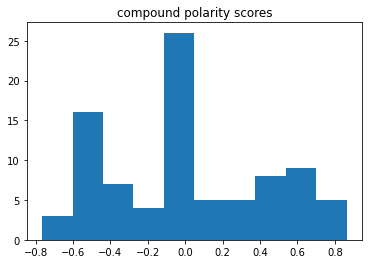

In [47]:
plt.hist([t['compound'] for t in nltk_sentiments_dict.values()])
plt.title("compound polarity scores")

Text(0.5, 1.0, 'positive polarity scores')

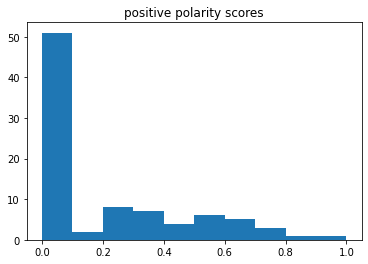

In [48]:
plt.hist([t['pos'] for t in nltk_sentiments_dict.values()])
plt.title("positive polarity scores")

Text(0.5, 1.0, 'negative polarity scores')

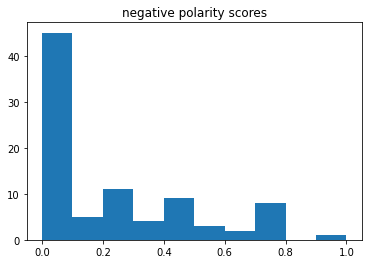

In [49]:
plt.hist([t['neg'] for t in nltk_sentiments_dict.values()])
plt.title("negative polarity scores")